In [41]:
from lxml import etree
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.collections import PatchCollection
from matplotlib.colorbar import ColorbarBase
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep
# from pysal.esda.mapclassify import Natural_Breaks as nb
from descartes import PolygonPatch
import mapclassify as mc
import fiona
from itertools import chain
import random
import math
import scipy


df = pd.read_csv('Neighborhoods.csv', low_memory=False)
df_map = pd.read_csv('SFMapInfo.csv')


def logit(x):
    return 300 / (1 + np.exp(-0.01*(x-500)))

In [2]:
cats = df.groupby(['neighborhood', 'subject_race', 'search_conducted'], ).count()

In [5]:
test = df.groupby(['neighborhood', 'subject_race'], ).count()
test.loc['Alamo Square', 'black']['search_conducted']

938

In [6]:
test2 = df.groupby(['subject_race', 'neighborhood', 'search_conducted']).count()
sum(test2.loc['black', 'Alamo Square']['district'])
minority = test2.loc['black', 'Alamo Square']['district']
white = test2.loc['white', 'Alamo Square']['district']

whiteprop = white[1]/sum(white)
minprop = minority[1]/sum(minority)

whiteprop, minprop

(0.030408340573414423, 0.1311659192825112)

In [42]:
test2 = df.groupby(['subject_race', 'neighborhood', 'search_conducted']).count()
rtpoints = {'black': [], 'asian/pacific islander':[], 'hispanic':[]}


for hood in df_map['ward_name']:
    for peeps in rtpoints.keys():
        try:
            minority = test2.loc[peeps, hood]['district']
            white = test2.loc['white', hood]['district']
            whiteprop = white[1]/sum(white)
            minprop = minority[1]/sum(minority)
            #size = logit(sum(minority))
            if sum(minority) > 3000: size = -1
            else:                     size = logit(sum(minority))
                
            rtpoints[peeps].append((whiteprop, minprop, hood, size))
        except:
            #print("Oops!")
            continue
            

In [ ]:
size = df.groupby(['search_conducted', 'subject_race', 'neighborhood']).count()
size.loc[True,'asian/pacific islander']

In [9]:
#sorted(rtpoints['hispanic'], key = lambda x: x[3])
#vals = sorted(rtpoints['black'], key=lambda x: x[3])

data for black threshold
data for asian/pacific islander threshold
data for hispanic threshold


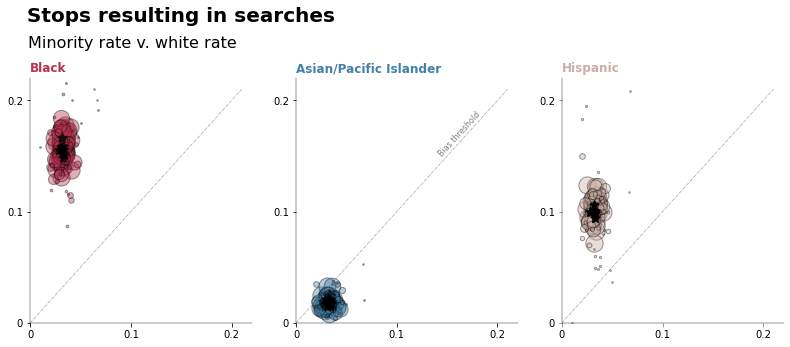

In [44]:
fig, ax = plt.subplots(ncols = 3, figsize = (13.5, 4.5))
plt.subplots_adjust(wspace=0.2)
plt.tick_params(axis = 'both', color = 'gray')

def whichone(c, clist, cstring):
    #print(c)
    if c == -1:
        #print('this happened!')
        return cstring
    else:
        return clist

#color_white =    '#F0F9E8' ---> ‘#3FBDCB’
#color_black =    '#7BCCC4' ---> '#B6324F’
#color_hispanic = '#2B8CBE' ---> ‘#CEADA4’
#color_asian =    '#BAE4BC' ---> ‘#4580A9’
colours = {'asian/pacific islander':'#4580A9', 'black': '#B6324F', 'hispanic':'#CEADA4'}
colors = ['#B6324F', '#4580A9', '#CEADA4']
peoples = ['black', 'asian/pacific islander', 'hispanic']
for i in range(0, 3):
    ax[i].spines['top'].set_visible(False) 
    ax[i].spines['right'].set_visible(False) 
    ax[i].spines['left'].set_linewidth(0.4) 
    ax[i].spines['bottom'].set_linewidth(.4)
    ax[i].set_yticks([0, 0.1, 0.2])
    ax[i].set_yticklabels(['0', '0.1', '0.2'], fontsize = 10)
    ax[i].set_xticks([0, 0.1, 0.2])
    ax[i].set_xticklabels(['0', '0.1', '0.2'], fontsize = 10)
    ax[i].set_xlim([0,0.22])
    ax[i].set_ylim([0,0.22])
    #ax[i].set_xlim([.1,0.2])
    #ax[i].set_ylim([0.3,0.5])


# ax[0].set_yticks([0, 0.1, 0.2])
# ax[0].set_yticklabels(['0', '0.1', '0.2'], fontsize = 10)
# ax[0].set_xticks([0, 0.1, 0.2])
# ax[0].set_xticklabels(['0', '0.1', '0.2'], fontsize = 10)
# ax[0].set_xlim([0.01,0.22])
# ax[0].set_ylim([0.01,0.22])

for i in range(len(colors)):
    ax[i].set_title(f'%s' % peoples[i].title(), loc = 'left', color = colors[i], weight='bold')
    #ax[i].set_ylabel(f'%s' % list(rtpoints.keys())[i].title())


print('data for black threshold')
#spb = rtpoints['black'].sort(key=lambda x: x[3])

for (i, j, k, l) in sorted(rtpoints['black'], key=lambda x: x[3], reverse = True):
    ax[0].scatter(i, j,
                    s = whichone(l, l, 100), 
                    color = whichone(l ,colours['black'], 'black'),
                    alpha = whichone(l, 0.4, 0.7),
                    marker = whichone(l, 'o', (5, 1, 0)),
                    edgecolors= "black")


print('data for asian/pacific islander threshold')
for (i, j, k, l) in sorted(rtpoints['asian/pacific islander'], key=lambda x:x[3], reverse=True):
    ax[1].scatter(i, j, 
                    s = whichone(l, l, 200), 
                    color = whichone(l ,colours['asian/pacific islander'], 'black'),
                    alpha = whichone(l, 0.4, 0.5),
                    marker = whichone(l, 'o', (5, 1, 0)),
                    edgecolors= "black")
#ax[1].set_xlabel('White Search Rate')
xval = .14
yval = .15
threshold = ax[1].annotate("Bias threshold", xy=[xval,yval], xytext=[xval,yval], color = 'gray', fontsize=8)
threshold.set_rotation(47.4)

print('data for hispanic threshold')
for (i, j, k, l) in sorted(rtpoints['hispanic'], key = lambda x:x[3], reverse = True):
    ax[2].scatter(i, j, 
                    s = whichone(l, l, 100), 
                    color = whichone(l ,colours['hispanic'], 'black'),
                    alpha = whichone(l, 0.4, 1),
                    marker = whichone(l, 'o', (5, 1, 0)),
                    edgecolors= "black")

    
plt.suptitle('Stops resulting in searches', ha = 'center', fontsize = 20, y=1.1, x=0.28, weight = 'bold')
plt.title('Minority rate v. white rate', x=-1.94, y=1.1, fontsize = 16)
    
[line.plot([0, 0.21], [0, 0.21], '-.', linewidth=0.5, color='gray') for line in ax]
plt.savefig('Threshold_Searches.png', bbox_inches="tight")



    
#col = whatcolor(254, 'clist', 'cstring')
#print(col)

plt.show()

# Process to get the number of searches
search = df.groupby(['subject_race', 'neighborhood', 'search_conducted']).count()
search.head()

In [9]:
#Process to get number of hits
hits = df.groupby(['subject_race', 'neighborhood', 'contraband_found']).count()
hits.head()

#Total Searches
sum(hits.loc['asian/pacific islander', 'Anza Vista']['district'])

4

In [18]:
test2 = df.groupby(['subject_race', 'neighborhood', 'contraband_found']).count()

rtpoints = {'black': [], 'asian/pacific islander':[], 'hispanic':[]}

def logit2(x):
    return 300 / (1 + np.exp(-0.01*(x-270)))

for hood in df_map['ward_name']:
    for peeps in rtpoints.keys():
        try:
            minority = test2.loc[peeps, hood]['district']
            white = test2.loc['white', hood]['district']
            whiteprop = white[1]/sum(white)
            minprop = minority[1]/sum(minority)
            #size = sum(minority)
            if sum(minority) > 500: size = -1
            else:                     size = logit2(sum(minority))
            rtpoints[peeps].append((whiteprop, minprop, hood, size))
        except:
            #print("Oops!")
            continue
       

In [17]:
sorted(rtpoints['hispanic'], key = lambda x:x[3])

[(0.22854561878952123, 0.09375, 'South of Market', -1),
 (0.3333333333333333, 0.5, 'Sherwood Forest', 19.24916292155218),
 (0.2857142857142857, 0.2, 'Yerba Buena Island', 19.796702847365637),
 (0.2727272727272727, 0.4, 'Peralta Heights', 19.796702847365637),
 (0.25, 0.2, 'Balboa Terrace', 19.796702847365637),
 (0.2727272727272727, 0.16666666666666666, 'Cow Hollow', 19.982410672527195),
 (0.16666666666666666,
  0.16666666666666666,
  'Midtown Terrace',
  19.982410672527195),
 (0.38095238095238093, 0.15384615384615385, 'Lake Street', 21.328291225286154),
 (0.1, 0.07692307692307693, 'Upper Market', 21.328291225286154),
 (0.18181818181818182,
  0.21428571428571427,
  'St. Francis Wood',
  21.5272626791254),
 (0.14285714285714285, 0.2, 'Laguna Honda', 21.727945608455308),
 (0.3333333333333333,
  0.06666666666666667,
  'Diamond Heights',
  21.727945608455308),
 (0.21052631578947367, 0.13333333333333333, 'Fairmount', 21.727945608455308),
 (0.25, 0.06666666666666667, 'Little Hollywood', 21.727

data for black threshold
data for asian/pacific islander threshold
data for hispanic threshold


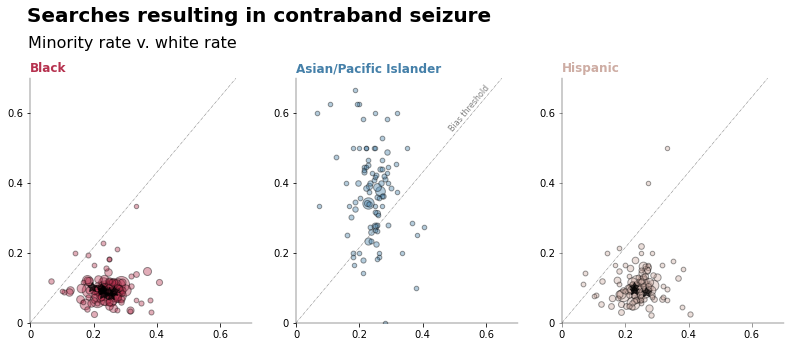

In [34]:
def whichone(c, clist, cstring):
    #print(c)
    if c == -1:
        #print('this happened!')
        return cstring
    else:
        return clist

fig, ax = plt.subplots(ncols = 3, figsize = (13.5, 4.5))
plt.subplots_adjust(wspace=0.2)
plt.tick_params(axis = 'both', color = 'gray')

#color_white =    '#F0F9E8' ---> ‘#3FBDCB’
#color_black =    '#7BCCC4' ---> '#B6324F’
#color_hispanic = '#2B8CBE' ---> ‘#CEADA4’
#color_asian =    '#BAE4BC' ---> ‘#4580A9’
colours = {'asian/pacific islander':'#4580A9', 'black': '#B6324F', 'hispanic':'#CEADA4'}
colors = ['#B6324F', '#4580A9', '#CEADA4']
peoples = ['black', 'asian/pacific islander', 'hispanic']

for i in range(0, 3):
    ax[i].spines['top'].set_visible(False) 
    ax[i].spines['right'].set_visible(False) 
    ax[i].spines['left'].set_linewidth(0.4) 
    ax[i].spines['bottom'].set_linewidth(.4)
    ax[i].set_yticks([0, 0.2, 0.4, 0.6])
    ax[i].set_yticklabels(['0', '0.2', '0.4', '0.6'], fontsize = 10)
    ax[i].set_xticks([0, 0.2, 0.4, 0.6])
    ax[i].set_xticklabels(['0', '0.2', '0.4', '0.6'], fontsize = 10)
    ax[i].set_xlim([0,0.7])
    ax[i].set_ylim([0,0.7])
    #ax[i].set_xlim([.1,0.2])
    #ax[i].set_ylim([0.3,0.5])

for i in range(len(colors)):
    ax[i].set_title(f'%s' % peoples[i].title(), loc = 'left', color = colors[i], weight='bold')
    #ax[i].set_ylabel(f'%s' % list(rtpoints.keys())[i].title())

    
print('data for black threshold')
for (i, j, k, l) in sorted(rtpoints['black'], key = lambda x:x[3], reverse = True):
    ax[0].scatter(i, j,
                    s = whichone(l, l, 100), 
                    color = whichone(l ,colours['black'], 'black'),
                    alpha = whichone(l, 0.4, 0.7),
                    marker = whichone(l, 'o', (5, 1, 0)),
                    edgecolors= "black")

print('data for asian/pacific islander threshold')
for (i, j, k, l) in sorted(rtpoints['asian/pacific islander'], key = lambda x:x[3], reverse = True):
    ax[1].scatter(i, j, 
                    s = whichone(l, l, 100), 
                    color = whichone(l ,colours['asian/pacific islander'], 'black'),
                    alpha = whichone(l, 0.4, 0.7),
                    marker = whichone(l, 'o', (5, 1, 0)),
                    edgecolors= "black")

    
    
    #ax[1].set_xlabel('White Seizure Rate')
xval = .48
yval = .55
threshold = ax[1].annotate("Bias threshold", xy=[xval,yval], xytext=[xval,yval], color = 'gray', fontsize=8)
threshold.set_rotation(50)

print('data for hispanic threshold')
for (i, j, k,l) in sorted(rtpoints['hispanic'], key = lambda x:x[3], reverse = True):
    ax[2].scatter(i, j,
                    s = whichone(l, l, 100), 
                    color = whichone(l ,colours['hispanic'], 'black'),
                    alpha = whichone(l, 0.4, 0.7),
                    marker = whichone(l, 'o', (5, 1, 0)),
                    edgecolors= "black")

    
#plt.suptitle('Proportion of Non-White searches vs. White searches', ha = 'center', fontsize = 20, y=1.1, x=.433, weight = 'bold')
plt.suptitle('Searches resulting in contraband seizure', ha = 'center', fontsize = 20, y=1.1, x=.36, weight = 'bold')
plt.title('Minority rate v. white rate', x=-1.94, y=1.1, fontsize = 16)
    
[line.plot([0, 0.65], [0, 0.7], '-.', linewidth=0.5, color='gray') for line in ax]
plt.savefig('Threshold_Seizure.png', bbox_inches="tight")




plt.show()

In [9]:
#Attempt at re-creating the threshold test (revisit during break or when learning about Monte Carlo/Markov Chains!)

thresh = test[['search_conducted', 'contraband_found']].copy()
#First test of the values will be in finding the threshold for black individuals in alamo square

#probability stopped driver in neighborhood has contraband
phi_n = sum(thresh.loc['Alamo Square']['contraband_found']) / sum(thresh.loc['Alamo Square']['search_conducted'])

#probability stopped driver of color has contraband
race = df.groupby('subject_race').count()
phi_r = race.loc['black']['contraband_found'] / race.loc['black']['search_conducted']

phi_rn = scipy.special.expit(phi_r+phi_n)
phi_r, phi_n, phi_rn

#different races
l_r = 5

neighb = df.groupby('neighborhood').count()
#different neighborhoods
l_n = len(neighb.index)

l_rn = math.exp(l_r+l_n)
l_r, l_n, l_rn

scipy.special.beta(0.00000001, l_rn)

t_r = race.loc['white']['contraband_found'] / race.loc['white']['search_conducted']
t_r